In [1]:
import numpy as np
from matplotlib import pyplot as plt
from scipy import stats

In [2]:
def plot_posterior(mean, cov, ax, n):
    resolution = 100

    grid_x = grid_y = np.linspace(-1, 1, resolution)
    grid_flat = np.dstack(np.meshgrid(grid_x, grid_y)).reshape(-1, 2)

    densities = stats.multivariate_normal.pdf(grid_flat, mean=mean.ravel(), cov=cov).reshape(resolution, resolution)
    ax.imshow(densities, origin='lower', extent=(-1, 1, -1, 1))
    ax.set_title('N = {}'.format(n))
    ax.set_xlabel('w0')
    ax.set_ylabel('w1')

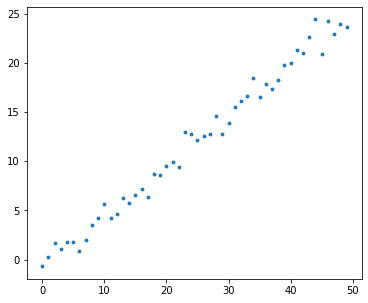

In [3]:
a0 = -0.3
a1 = 0.5
x = np.arange(50).reshape(50, 1)
y = a0 + a1 * x
t = y + np.random.randn(50, 1)

plt.figure(figsize=(6, 5))
plt.scatter(x, t, s=8)

In [4]:
alpha = 2
beta = 25

In [5]:
def compute_posterior(beta, alpha, design_matrix, target):
    cov_inv = alpha * np.eye(design_matrix.shape[1]) + beta * design_matrix.T.dot(design_matrix)
    cov = np.linalg.inv(cov_inv)
    mean = np.dot(beta * cov, design_matrix.T)
    mean = np.dot(mean, target)
    return mean, cov

In [6]:
M = 2
bias = np.ones(len(x)).reshape(-1, 1)
x = x.reshape(-1, 1)
design_matrix = np.repeat(x, M-1, axis=1)
design_matrix = np.concatenate((bias, design_matrix), axis=1)
design_matrix[:5]

array([[1., 0.],
       [1., 1.],
       [1., 2.],
       [1., 3.],
       [1., 4.]])

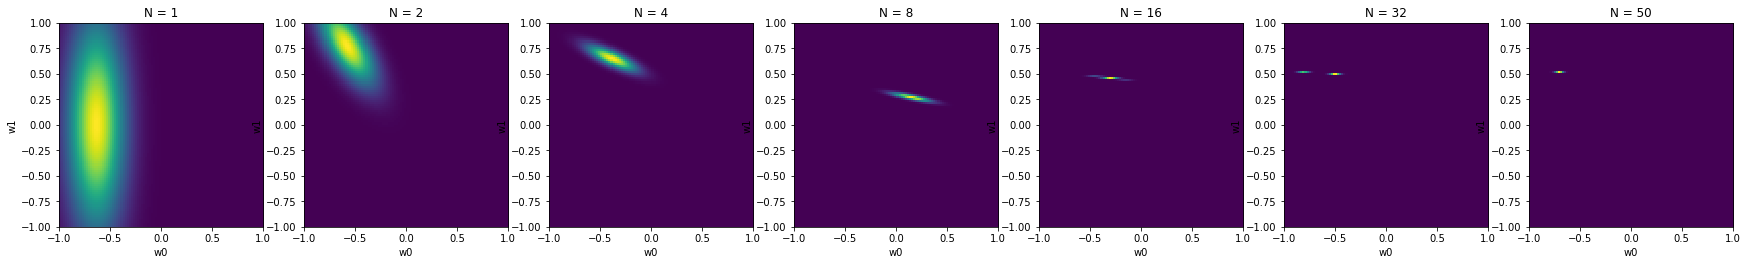

In [7]:
N = [1, 2, 4, 8, 16, 32, 50]
fig, axes = plt.subplots(1, 7, figsize=(30, 15))
means, covs = [], []
for n, ax in zip(N, axes.flatten()):
    mean, cov = compute_posterior(beta, alpha, design_matrix[:n], t[:n])
    means.append(mean)
    covs.append(cov)
    plot_posterior(mean, cov, ax, n)

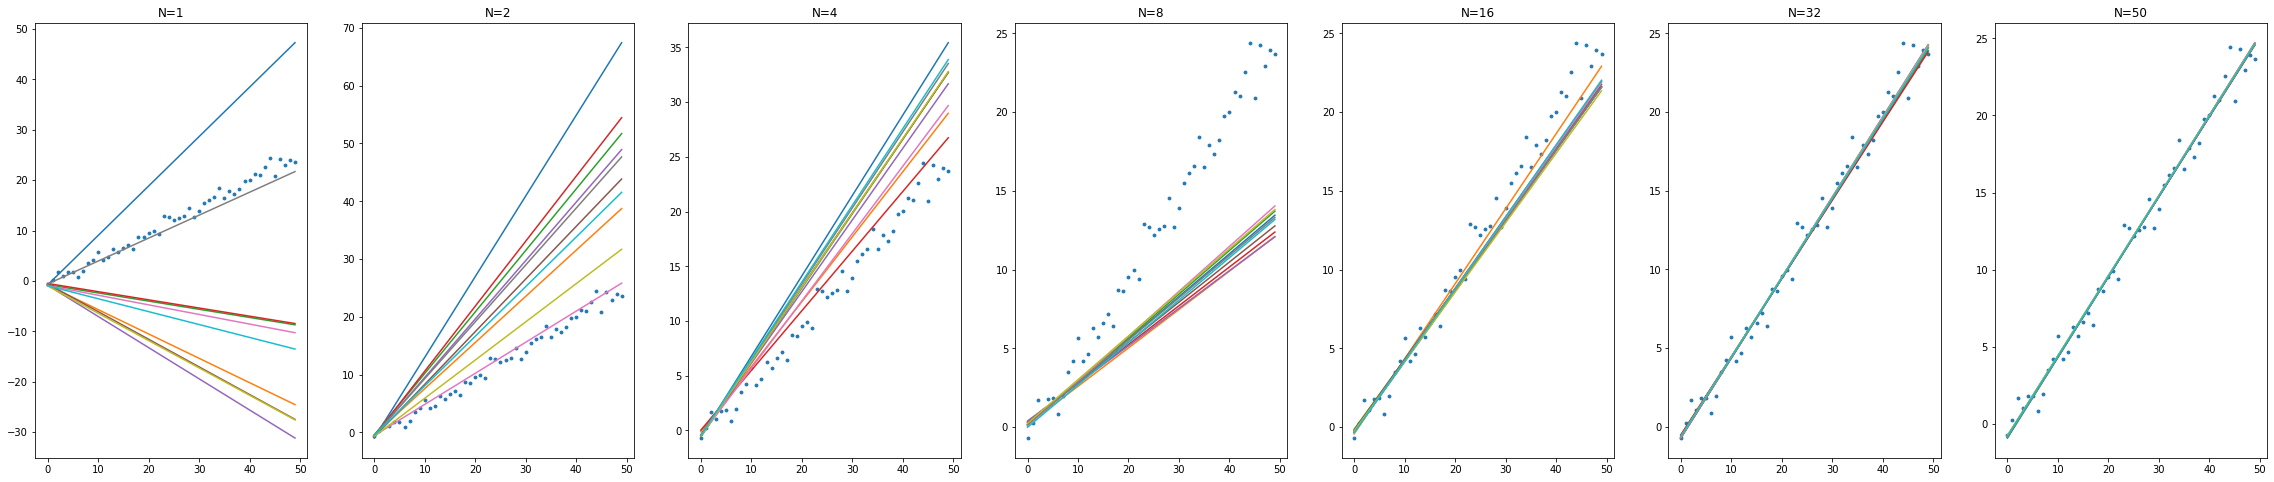

In [16]:
fig, axes = plt.subplots(1, 7 ,figsize=(40, 8))

for mean, cov, ax, n in zip(means, covs, axes.flatten(), N):
    ax.scatter(x, t, s=8)
    for _ in range(10):
        a0_hat, a1_hat = stats.multivariate_normal.rvs(mean=mean.ravel(), cov=cov)
        t_hat = a0_hat + a1_hat * x
        ax.plot(x, t_hat)
        ax.set_title('N={}'.format(n))